In [18]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os



'''  
give everything the same weight

we are given 10 years of data of the 6 stocks
then we start trading on the next day after training data

'''

'  \ngive everything the same weight\n\nwe are given 10 years of data of the 6 stocks\nthen we start trading on the next day after training data\n\n'

In [42]:
# read in data 
'''
df = pd.read_csv('case2data.csv')
df = df.drop(df.columns[0], axis = 1)
train = df.iloc[:1260,:]
train = train.to_numpy()
test = df.iloc[1200:, :]
test = test.to_numpy()
print(test)
df.plot(figsize=(18, 12))
'''
data = pd.read_csv('case2data.csv', index_col = 0)

'''
We recommend that you change your train and test split
'''

train, test = train_test_split(data, test_size = 0.2, shuffle = False)

In [38]:
def calculateWeights():
    return [1/6, 1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

[[-4.44464106e-01  6.97293904e-01 -6.58759992e-02  4.95897635e-03
   4.60336808e-01  8.49477124e-01]
 [-6.71481621e-01  9.13606570e-01 -1.82530987e-01 -1.86385576e-01
   8.25694107e-01  1.13282642e+00]
 [-7.68703745e-01  7.24388516e-01 -2.10018585e-02  4.28486233e-02
   2.94885141e-01  1.11485836e+00]
 ...
 [ 1.99337532e+01 -9.38145734e+00  7.81738632e+00  1.43832967e+01
   4.77184681e+00  1.53853850e+00]
 [ 1.89120096e+01 -9.30386451e+00  7.86931279e+00  1.44289035e+01
   5.81418944e+00  2.05625356e+00]
 [ 1.95504521e+01 -9.28953982e+00  7.79806497e+00  1.46212127e+01
   5.72641375e+00  2.16500464e+00]]


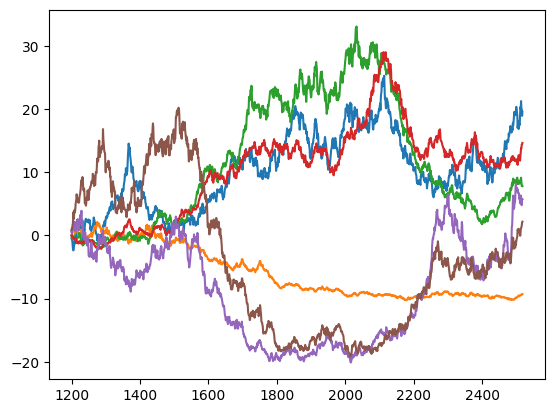

In [ ]:
# main run
totalprofits = np.zeros((test.shape[0] - 1, 6))
currentprofits = np.zeros(6)

for i in range (test.shape[0] - 1):
    weights = calculateWeights() # at a round i
    currentprofits += returnprofits(weights, i)
    totalprofits[i] = currentprofits

x = np.arange(start=1200, stop=2519, step=1)

fig = plt.figure()
for m in range(6):
    #print(totalprofits[:, m])
    plt.plot(x, totalprofits[:, m], label = m)
    
print(totalprofits)
    
''' 
1000
0.5 into stock -> invest 500
500 in 5 stocks and price from 100 to 120 -> my money goes to 600
'''

In [39]:
## given grading data
class Allocator():
    def __init__(self, train_data):
        '''
        Anything data you want to store between days must be stored in a class field
        '''
        
        self.running_price_paths = train_data.copy()
        
        self.train_data = train_data.copy()
        
        # Do any preprocessing here -- do not touch running_price_paths, it will store the price path up to that data
        
        
    def allocate_portfolio(self, asset_prices):
        '''
        asset_prices: np array of length 6, prices of the 6 assets on a particular day
        weights: np array of length 6, portfolio allocation for the next day
        '''
        self.running_price_paths.append(asset_prices, ignore_index = True)
    
        ### TODO Implement your code here
        weights = calculateWeights()
        
        return weights
    
    
def grading(train_data, test_data): 
    '''
    Grading Script
    '''
    weights = np.full(shape=(len(test_data.index),6), fill_value=0.0)
    alloc = Allocator(train_data)
    for i in range(0,len(test_data)):
        weights[i,:] = alloc.allocate_portfolio(test_data.iloc[i,:])
        if np.sum(weights < -1) or np.sum(weights > 1):
            raise Exception("Weights Outside of Bounds")
    
    capital = [1]
    for i in range(len(test_data) - 1):
        shares = capital[-1] * weights[i] / np.array(test_data.iloc[i,:])
        balance = capital[-1] - np.dot(shares, np.array(test_data.iloc[i,:]))
        net_change = np.dot(shares, np.array(test_data.iloc[i+1,:]))
        capital.append(balance + net_change)
    capital = np.array(capital)
    returns = (capital[1:] - capital[:-1]) / capital[:-1]
    
    if np.std(returns) != 0:
        sharpe = np.mean(returns) / np.std(returns)
    else:
        sharpe = 0
        
    return sharpe, capital, weights

In [43]:
sharpe, capital, weights = grading(train, test)

AttributeError: 'DataFrame' object has no attribute 'append'